In [2]:
import pandas as pd
import re
import seaborn as sns

1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Вопрос: сколько в датасете пропущенных значений?

In [3]:
transaction_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-kireeva/shared/homeworks/python_ds_miniprojects/5/transaction_data.csv')

In [4]:
transaction_data.shape

(5315, 3)

In [5]:
transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

In [6]:
transaction_data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


In [7]:
transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

2. Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? 
Визуализируйте результат с помощью барплота.

Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

In [8]:
tr = transaction_data.value_counts('transaction').reset_index()
tr = tr.rename(columns={0: 'how_many'})
tr


,transaction,how_many
0,successfull,3692
1,cancelled,1619
2,error,4


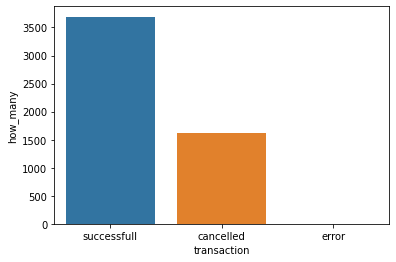

In [9]:
sns.barplot(x = 'transaction', y = 'how_many', data=tr)

3. Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

по оси x – число транзакций
по оси y – доля пользователей с таким числом транзакций

In [10]:
users_statistic = transaction_data.query('transaction == "successfull"')\
            .value_counts('name')\
            .reset_index()\
            .rename(columns={0: 'how_many'})
users_statistic

,name,how_many
0,Svetlana_Smirnova,82
1,Masha_Ozerova,80
2,Olga_Smirnova,80
3,Svetlana_Ivanova,79
4,Masha_Polyanova,78
5,Svetlana_Polyanova,78
6,Ekaterina_Smirnova,77
7,Irina_Lesnova,76
8,Irina_Ozerova,76
9,Lolita_Ivanova,76


In [11]:
users_statistic.how_many.describe()

count    56.000000
mean     65.928571
std       7.787769
min      46.000000
25%      61.000000
50%      64.000000
75%      72.000000
max      82.000000
Name: how_many, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


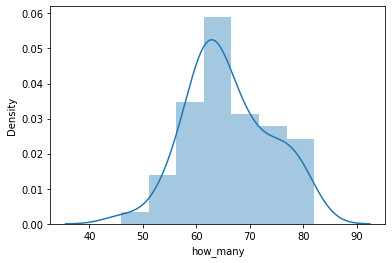

In [12]:
sns.distplot(users_statistic.how_many)

4. К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

столбцы – имена пользователей

строки – минута времени осуществления операции (minute)

значения – число совершённых операций

Пропущенные значения заполните нулями.

Note: фильтровать успешные транзакции не нужно - постройте табличку по всем

In [13]:
df = pd.read_csv('transaction_data_updated.csv', parse_dates = ['date'])
df

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [14]:
name_count = df.value_counts(['name', 'minute'])\
        .reset_index()\
        .rename(columns={0: 'count'})

user_vs_minute_pivot = name_count.pivot(index='minute', columns='name', values='count').fillna(0)
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


5. посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).

In [15]:
df['true_minute'] = df.date.dt.hour * 60 + df.date.dt.minute
df

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


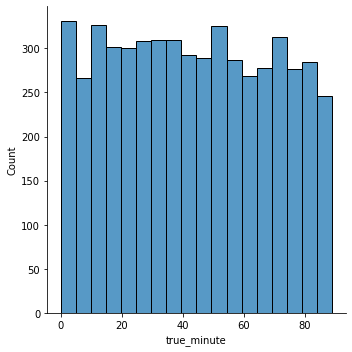

In [16]:
sns.displot(df.true_minute)

In [17]:
??sns.displot